# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Kenny Wongchamcharoen
**Date:** 08/26/24

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview
The purpose of this project is to analyze consumer reviews for Beats by Dre products to gain insights into customer sentiment and identify areas for Beats Pills Speakers and marketing strategy improvements. The key objectives include performing exploratory data analysis (EDA), conducting sentiment analysis, leveraging Gemini AI tools for generating insights, and comparing Beats by Dre with its competitors to understand market positioning

### 3.2 Background
Beats by Dre, a subsidiary of Apple Inc., is a prominent brand known for its high-quality headphones and audio products. The brand has established itself as a leader in the premium audio equipment market by combining innovative technology with stylish design. Analyzing consumer sentiment is crucial in the tech industry, where consumer preferences and perceptions can heavily influence market dynamics.


## 4. Data Description

### 4.1 Data Sources

The dataset used for this analysis consists of customer reviews for Beats Pill Speakers, as well as its competitors' products like Bose and Sony, scraped from Amazon. Amazon is a popular e-commerce platform where consumers frequently share detailed reviews and ratings, providing a rich source of consumer insights.

### 4.2 Data Collection
Explain the data gathering process, including any challenges faced and how they were overcome.

The data was collected using web scraping techniques with Python libraries like BeautifulSoup and Scrapy, as well as API tools such as oxylab. Some challenges included handling missing data and ensuring the reviews were correctly matched with the respective products

### 4.3 Data Cleaning
Outline the steps taken to clean and preprocess the data, highlighting any significant decisions made during this process.

Load the data below and process cleaning here.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# load the dataset
data = pd.read_csv('merged_reviews.csv')
data.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R4BQHA0TLLJNN,B0D4SX9RC6,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,True,1,Color: Champagne GoldStyle: PillPattern: Witho...
1,R1ZHHB1YMHA1IF,B0D4SX9RC6,5.0 out of 5 stars Get a pair! You won’t regre...,I D Yelle,5,The Beats Pill (2024) has made a triumphant co...,"Reviewed in the United States June 29, 2024",AHO3EI5OGMXQFUMRJBH665YZXMBQ,True,21,Color: Matte BlackStyle: PillPattern: Without ...
2,R172ODWJHF6PC5,B0D4SX9RC6,5.0 out of 5 stars Premium portable speaker,John S.,5,My original Wonderboom finally gave up so I bo...,"Reviewed in the United States July 28, 2024",AFJKZEYD2VZSI2NO3JZNMA4XX4RA,True,0,Color: Matte BlackStyle: PillPattern: Without ...
3,R102ZHXOOGDR18,B0D4SX9RC6,5.0 out of 5 stars Amazing sound for the size,Maxy D,5,This 2 pound speaker sounds insane for its siz...,"Reviewed in the United States July 19, 2024",AHNNPIFNRYHXRAOIN2G7WIJQDWEA,True,1,Color: Champagne GoldStyle: PillPattern: Witho...
4,R2GXSMDM76M1NO,B0D4SX9RC6,5.0 out of 5 stars Amazing sound quality and w...,Arjun Mohan Kumar,5,I have been using the beats pill 2024 for the ...,"Reviewed in the United States June 30, 2024",AFDIEYKPJMB43TMN4ALTGPWB5GUQ,True,1,Color: Matte BlackStyle: PillPattern: Without ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           601 non-null    object
 1   product_id          601 non-null    object
 2   title               601 non-null    object
 3   author              601 non-null    object
 4   rating              601 non-null    int64 
 5   content             601 non-null    object
 6   timestamp           601 non-null    object
 7   profile_id          588 non-null    object
 8   is_verified         601 non-null    bool  
 9   helpful_count       601 non-null    int64 
 10  product_attributes  598 non-null    object
dtypes: bool(1), int64(2), object(8)
memory usage: 47.7+ KB


In [6]:
data.describe()


,rating,helpful_count
count,601.000000,601.000000
mean,4.603993,4.231281
std,0.869627,17.661958
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,2.000000
max,5.000000,214.000000


In [7]:
data.isnull().sum()

,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,13
is_verified,0
helpful_count,0


The dataset contains missing values in the profile_id and product_attributes columns:

profile_id: 13 missing values.
product_attributes: 3 missing values.
Handling Missing Values

profile_id: Since profile_id is a unique identifier for reviewers and has relatively few missing values, I'll fill these with a placeholder indicating missing data ('Unknown').

product_attributes: This column appears to contain string information about the product, which might be useful for analysis. We'll also fill these missing values with a placeholder ('Not Provided') to avoid losing potential information.

In [8]:
# Fill missing values with appropriate placeholders
data['profile_id'].fillna('Unknown', inplace=True)
data['product_attributes'].fillna('Not Provided', inplace=True)

# Verify that missing values have been handled
missing_values_after = data.isnull().sum()
missing_values_after


,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0
helpful_count,0


## Identify and Handling of outliers

The only relevant numerical columns here are rating and helpful_count.

- rating: Ratings typically range from 1 to 5. We'll confirm that all ratings are within this expected range.

- helpful_count: This column can potentially have outliers if certain reviews have an unusually high helpful count. We'll use the interquartile range (IQR) method to identify any outliers.

In [9]:
# checking for outliers in the rating columns
rating_outliers = data[(data['rating'] < 1) | (data['rating'] > 5)]

# Calculate the IQR for 'helpful_count'
Q1 = data['helpful_count'].quantile(0.25)
Q3 = data['helpful_count'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in 'helpful_count' using the IQR method
helpful_outliers = data[(data['helpful_count'] < (Q1 - 1.5 * IQR)) | (data['helpful_count'] > (Q3 + 1.5 * IQR))]

In [10]:
# Cap the 'helpful_count' outliers at the 95th percentile
helpful_count_cap = data['helpful_count'].quantile(0.95)
data['helpful_count'] = data['helpful_count'].clip(upper=helpful_count_cap)

# Recheck for outliers after capping
helpful_outliers_after = data[(data['helpful_count'] < (Q1 - 1.5 * IQR)) | (data['helpful_count'] > (Q3 + 1.5 * IQR))]
helpful_outliers_after_count = len(helpful_outliers_after)

helpful_outliers_after_count

75

## Converting Categorical Columns to Numerical Variables

title, author, content, timestamp, product_attributes: These columns are textual and need not converted to numeric directly for analysis purposes unless specifically required (e.g., using TF-IDF for content).

is_verified: This is a binary categorical variable, which can be converted to numerical values (1 for True, 0 for False).

Let's convert the is_verified column to numerical values: ​

In [11]:
data['is_verified'] = data['is_verified'].astype(int)
data.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R4BQHA0TLLJNN,B0D4SX9RC6,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,1,1,Color: Champagne GoldStyle: PillPattern: Witho...
1,R1ZHHB1YMHA1IF,B0D4SX9RC6,5.0 out of 5 stars Get a pair! You won’t regre...,I D Yelle,5,The Beats Pill (2024) has made a triumphant co...,"Reviewed in the United States June 29, 2024",AHO3EI5OGMXQFUMRJBH665YZXMBQ,1,17,Color: Matte BlackStyle: PillPattern: Without ...
2,R172ODWJHF6PC5,B0D4SX9RC6,5.0 out of 5 stars Premium portable speaker,John S.,5,My original Wonderboom finally gave up so I bo...,"Reviewed in the United States July 28, 2024",AFJKZEYD2VZSI2NO3JZNMA4XX4RA,1,0,Color: Matte BlackStyle: PillPattern: Without ...
3,R102ZHXOOGDR18,B0D4SX9RC6,5.0 out of 5 stars Amazing sound for the size,Maxy D,5,This 2 pound speaker sounds insane for its siz...,"Reviewed in the United States July 19, 2024",AHNNPIFNRYHXRAOIN2G7WIJQDWEA,1,1,Color: Champagne GoldStyle: PillPattern: Witho...
4,R2GXSMDM76M1NO,B0D4SX9RC6,5.0 out of 5 stars Amazing sound quality and w...,Arjun Mohan Kumar,5,I have been using the beats pill 2024 for the ...,"Reviewed in the United States June 30, 2024",AFDIEYKPJMB43TMN4ALTGPWB5GUQ,1,1,Color: Matte BlackStyle: PillPattern: Without ...


In [12]:
# download the cleaned dataset
data.to_csv('cleaned_merged_data.csv', index=False)

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
A summary of the dataset, including key statistics (mean, median, mode, standard deviation, etc.).


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('cleaned_merged_data.csv')
df

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R4BQHA0TLLJNN,B0D4SX9RC6,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,1,1,Color: Champagne GoldStyle: PillPattern: Witho...
1,R1ZHHB1YMHA1IF,B0D4SX9RC6,5.0 out of 5 stars Get a pair! You won’t regre...,I D Yelle,5,The Beats Pill (2024) has made a triumphant co...,"Reviewed in the United States June 29, 2024",AHO3EI5OGMXQFUMRJBH665YZXMBQ,1,17,Color: Matte BlackStyle: PillPattern: Without ...
2,R172ODWJHF6PC5,B0D4SX9RC6,5.0 out of 5 stars Premium portable speaker,John S.,5,My original Wonderboom finally gave up so I bo...,"Reviewed in the United States July 28, 2024",AFJKZEYD2VZSI2NO3JZNMA4XX4RA,1,0,Color: Matte BlackStyle: PillPattern: Without ...
3,R102ZHXOOGDR18,B0D4SX9RC6,5.0 out of 5 stars Amazing sound for the size,Maxy D,5,This 2 pound speaker sounds insane for its siz...,"Reviewed in the United States July 19, 2024",AHNNPIFNRYHXRAOIN2G7WIJQDWEA,1,1,Color: Champagne GoldStyle: PillPattern: Witho...
4,R2GXSMDM76M1NO,B0D4SX9RC6,5.0 out of 5 stars Amazing sound quality and w...,Arjun Mohan Kumar,5,I have been using the beats pill 2024 for the ...,"Reviewed in the United States June 30, 2024",AFDIEYKPJMB43TMN4ALTGPWB5GUQ,1,1,Color: Matte BlackStyle: PillPattern: Without ...
...,...,...,...,...,...,...,...,...,...,...,...
596,R15PPSFDGLE3LI,B07MQWG3PR,3.0 out of 5 stars I expected a bit more,Kurt,3,"Based on the product description, the actual p...","Reviewed in the United States April 4, 2024",AGPNEDJVPCTEI2FMTYS7OVW76ASA,1,0,Color: Black
597,R24ZNTMWJN1BH6,B07MQWG3PR,5.0 out of 5 stars Works as advertised,Kenny Karavaggio,5,Very good speaker,"Reviewed in the United States May 3, 2024",AENXTVBR4DIDTW3NQHB72QHUBXRQ,1,0,Color: Black
598,R31BM44UVZJ568,B07MQWG3PR,4.0 out of 5 stars Love it but...,JP,4,"I bought this to take to the beach. Overall, I...","Reviewed in the United States May 1, 2021",AFHSWLMRKG54R4A3H5UMANWUVYQA,1,1,Color: Black
599,R3GB3BG1K22HQB,B07MQWG3PR,5.0 out of 5 stars Customer service is Excepti...,arc180,5,Updated Review to 5 stars due to outstanding c...,"Reviewed in the United States March 16, 2022",AG7N3FD4TBNZUM2LU64D5TD72W3A,1,1,Color: Black


In [16]:
# Descriptive statistics
df.describe()

# mean rating is 4.34
# 93% of the reviews is verified
# helpful count average is at 5.76 but the SD is extremely high

,rating,is_verified,helpful_count
count,601.000000,601.000000,601.000000
mean,4.603993,0.875208,2.168053
std,0.869627,0.330758,4.415131
min,1.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000
50%,5.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000
max,5.000000,1.000000,17.000000


### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

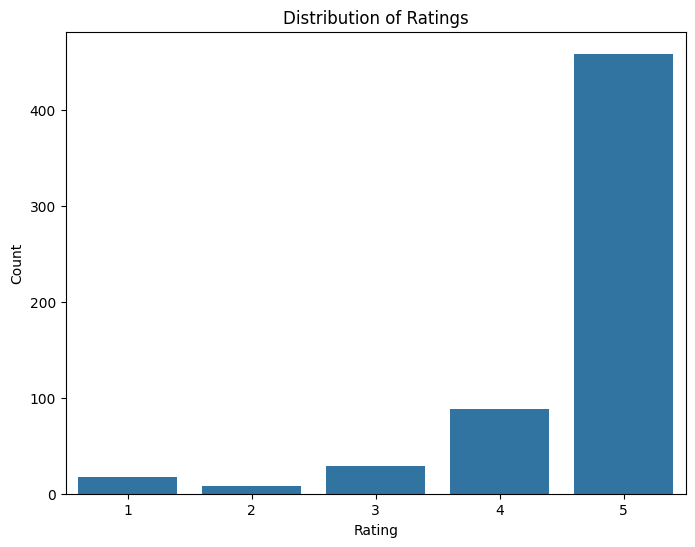

In [18]:

# Visualize the distribution of ratings

plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data= df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

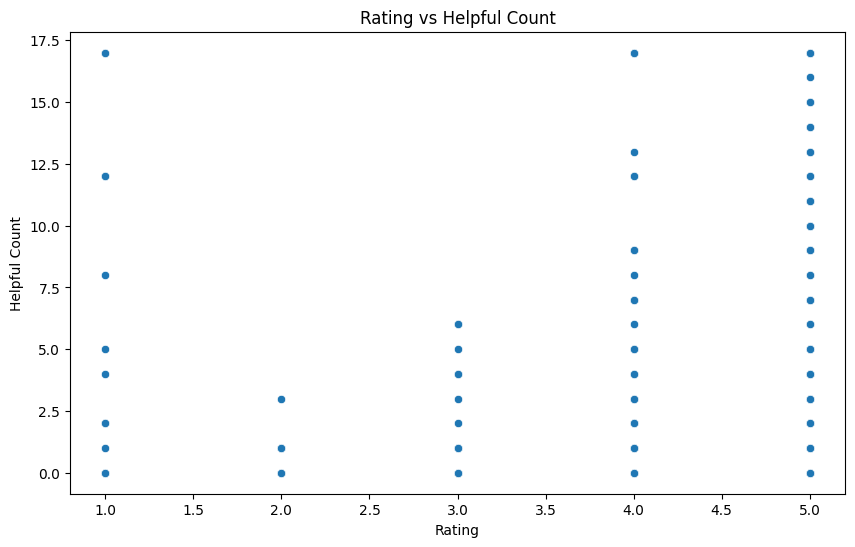

In [19]:
# Visualizing the relationship between rating and helpful_count

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='helpful_count', data=df)
plt.title('Rating vs Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()

Text(0, 0.5, 'Frequency')

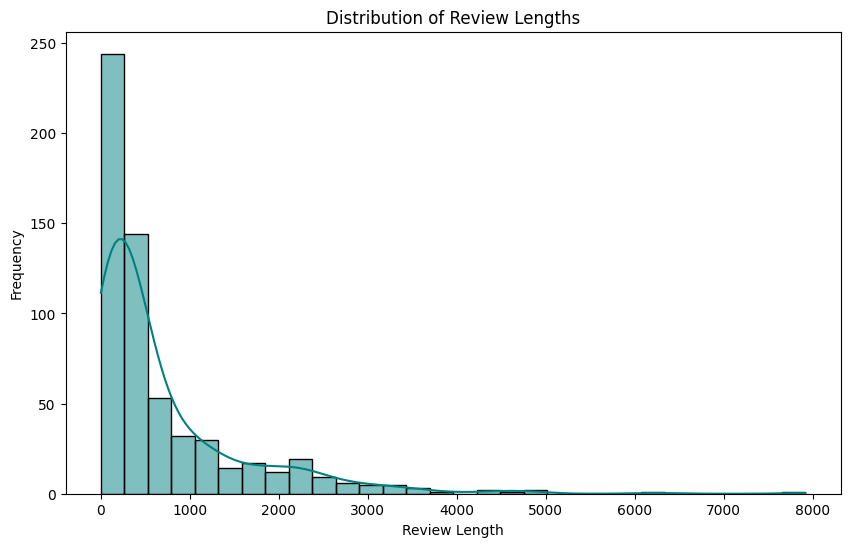

In [20]:
# Visualizing the distribution of review lengths (content)

df['review_length'] = df['content'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='teal')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')

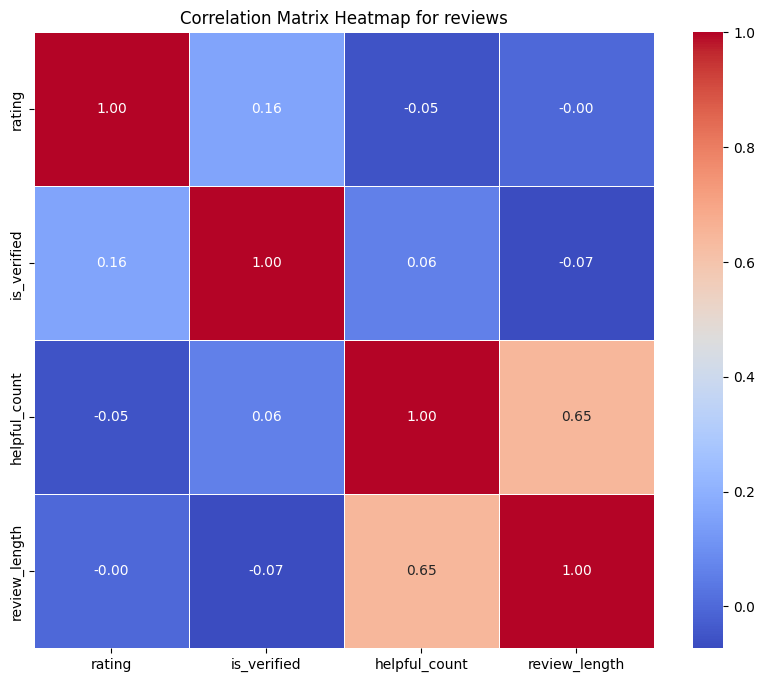

,rating,is_verified,helpful_count,review_length
rating,1.000000,0.158183,-0.052960,-0.002829
is_verified,0.158183,1.000000,0.060036,-0.072755
helpful_count,-0.052960,0.060036,1.000000,0.645343
review_length,-0.002829,-0.072755,0.645343,1.000000


In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for reviews')
plt.show()

correlation_matrix

## Interpretation of the Correlation Matrix:
Positive Correlation: Values closer to 1 indicate a strong positive correlation between variables.

Negative Correlation: Values closer to -1 indicate a strong negative correlation. If we observe a negative correlation, it suggests an inverse relationship between those variables.

No Correlation: Values close to 0 imply little to no linear relationship between the variables.

### 5.3 Descriptive Statistics
Discuss key findings from the descriptive statistics, highlighting any patterns, trends, or anomalies.

In [17]:
median = df.median(numeric_only=True)
mode = df.mode()
variance = df.var(numeric_only=True)
std = df.std(numeric_only=True)

print('The datasets median is:\n', median)
print('\nThe datasets mode is:\n', mode)
print('\nThe datasets variance is:\n', variance)
print('\nThe datasets standard deviation is:\n', std)

The datasets median is:
 rating           5.0
is_verified      1.0
helpful_count    0.0
dtype: float64

The datasets mode is:
           review_id  product_id                             title  \
0    R102ZHXOOGDR18  B07MQWG3PR  5.0 out of 5 stars Great speaker   
1    R10HG0NYCX0GCR  B08B951D35                               NaN   
2    R10YMC6EWZHJ82  B08LQNL42Z                               NaN   
3    R113D0AJ1VBZES  B0CXL5KTBD                               NaN   
4    R113XNEFSSLAKW         NaN                               NaN   
..              ...         ...                               ...   
596   RZ0I0HM9AX2AE         NaN                               NaN   
597   RZ3JZ2VUDV1OA         NaN                               NaN   
598   RZLFK0U17P3AL         NaN                               NaN   
599   RZPTG9XWQFW4T         NaN                               NaN   
600   RZSR6HETN19GU         NaN                               NaN   

              author  rating    content  \
0

## 6. Sentiment Analysis

In [22]:
from textblob import TextBlob
import nltk

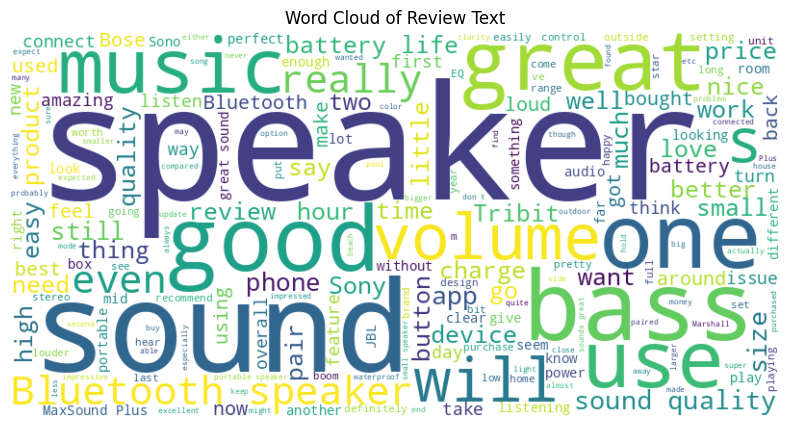

In [23]:
# Generate world cloud of reviews

# Word cloud of review text
from wordcloud import WordCloud

# Combine all review text into a single string
all_reviews = ' '.join(df['content'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

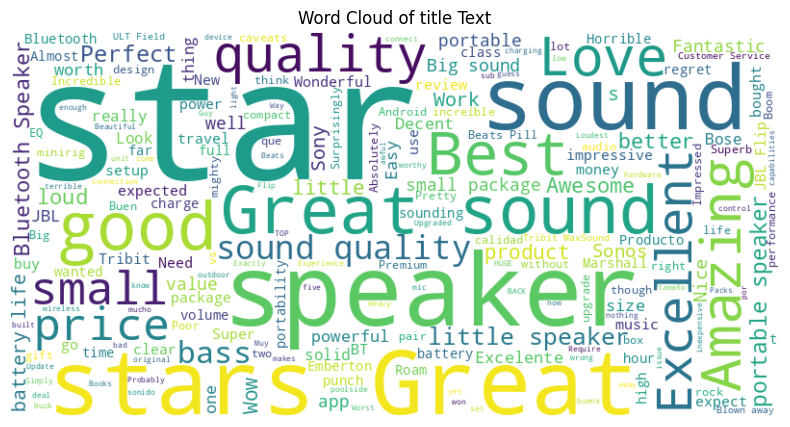

In [24]:
# Generate world cloud of title

# Word cloud of review text
from wordcloud import WordCloud

# Combine all review text into a single string
all_reviews = ' '.join(df['title'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of title Text')
plt.show()

### 6.2 Results
Present the sentiment analysis results, including visualizations of sentiment distribution, and discuss the overall sentiment towards Beats by Dre products.


In [26]:
# Perform Sentiment Analysis on the dataset by adding a polarity column to the dataset using apply function
df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Vice versa for subjectivity score
df['subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Create a function that classifies the reviews into positive, negative, and neutral sentiments

def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
      return 'Neutral'

df['sentiment'] = df['polarity'].apply(classify_sentiment)
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,review_length,polarity,subjectivity,sentiment
0,R4BQHA0TLLJNN,B0D4SX9RC6,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,1,1,Color: Champagne GoldStyle: PillPattern: Witho...,621,0.307318,0.663061,Positive
1,R1ZHHB1YMHA1IF,B0D4SX9RC6,5.0 out of 5 stars Get a pair! You won’t regre...,I D Yelle,5,The Beats Pill (2024) has made a triumphant co...,"Reviewed in the United States June 29, 2024",AHO3EI5OGMXQFUMRJBH665YZXMBQ,1,17,Color: Matte BlackStyle: PillPattern: Without ...,491,0.289669,0.562534,Positive
2,R172ODWJHF6PC5,B0D4SX9RC6,5.0 out of 5 stars Premium portable speaker,John S.,5,My original Wonderboom finally gave up so I bo...,"Reviewed in the United States July 28, 2024",AFJKZEYD2VZSI2NO3JZNMA4XX4RA,1,0,Color: Matte BlackStyle: PillPattern: Without ...,276,0.254375,0.636250,Positive
3,R102ZHXOOGDR18,B0D4SX9RC6,5.0 out of 5 stars Amazing sound for the size,Maxy D,5,This 2 pound speaker sounds insane for its siz...,"Reviewed in the United States July 19, 2024",AHNNPIFNRYHXRAOIN2G7WIJQDWEA,1,1,Color: Champagne GoldStyle: PillPattern: Witho...,253,0.076667,0.556667,Positive
4,R2GXSMDM76M1NO,B0D4SX9RC6,5.0 out of 5 stars Amazing sound quality and w...,Arjun Mohan Kumar,5,I have been using the beats pill 2024 for the ...,"Reviewed in the United States June 30, 2024",AFDIEYKPJMB43TMN4ALTGPWB5GUQ,1,1,Color: Matte BlackStyle: PillPattern: Without ...,386,0.102083,0.340972,Positive


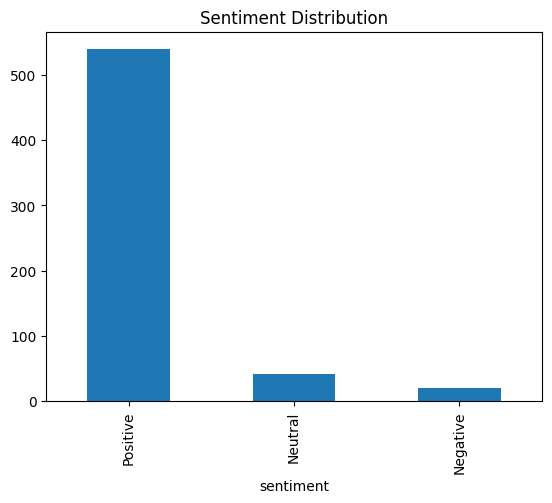

In [27]:
# Aggregate the sentiment of the reviews
sentiment_summary = df['sentiment'].value_counts()
sentiment_summary.plot(kind='bar', title='Sentiment Distribution')
plt.show()

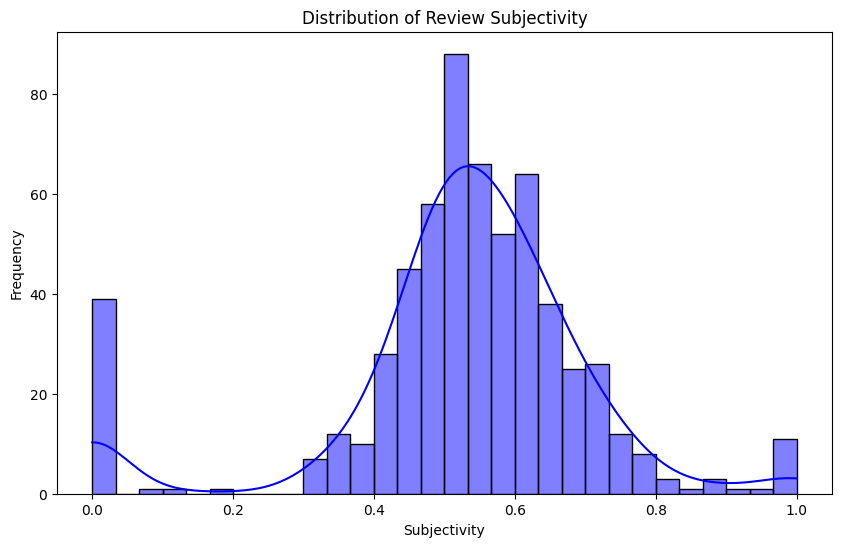

In [28]:

# Create a histogram for the subjectivity column
plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Review Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

Most reviews are overwhelmingly positive. The interesting question to further explore is

- Is the data source biased?
- Are people more willing to leave positive reviews if the ratings are good and just do not bother if the ratings are bad, hence skewing the data?

## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Gemini AI was employed to generate advanced insights from the sentiment analysis results, focusing on identifying customer pain points and potential areas for product improvement.

In [ ]:
import google.generativeai as genai

# Function to set up a simple chatbot
def simple_chatbot(api_key, message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    response = chat_session.send_message(message)
    return response.text

# Replace 'your_api_key' with the actual API key
api_key = "your_api_key"

message = "Write a short funny story"
chatbot_response = simple_chatbot(api_key, message)
print(chatbot_response)

### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


In [ ]:
# Select a subset of reviews

reviews_column_name = 'content'
reviews = df[reviews_column_name].head(100).tolist()

# Send prompts
prompt_message = "Analyze the negative reviews and summarize the key pain points:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Beats Pill 2024: Key Pain Points from Negative Reviews

While the Beats Pill 2024 receives praise for its sound quality, particularly its bass, and its compact, stylish design, several negative reviews highlight key pain points:

**1. Lack of App Control:**
* A significant complaint is the absence of a dedicated app to control the speaker. Users express frustration with the inability to adjust settings, check battery life, and manage connections.
* The existing Beats Pill+ app does not work with the new Pill.

**2. Sound Quality Issues at High Volumes:**
*  Multiple users report that the sound quality deteriorates at higher volumes, becoming muddy and distorted, especially in the bass frequencies.
*  The speaker's bass-heavy sound profile, while appreciated at lower volumes, can become overpowering and detrimental to sound quality at higher volumes.

**3. Button Interface:**
* Users find the four-button interface confusing and difficult to use, especially when it comes to turning the speaker off. They miss dedicated buttons for volume up/down and track up/down, leading to frustration with complex button combinations.

**4. Battery Life:**
* Some users report that the battery life does not reach the advertised 24 hours, especially when using the speaker at higher volumes. This inconsistency in battery performance leads to disappointment.

**5. Minor Issues:**
* Other minor issues mentioned include random power on/off behavior, difficulty with Siri integration, and a dusty back surface.

**Overall:**

The Beats Pill 2024 is a well-designed speaker with good sound quality at lower volumes. However, the lack of app control, sound issues at high volumes, and confusing button interface create significant frustrations for users. These pain points should be addressed by Beats to enhance the user experience and truly make the Pill 2024 a standout product.


### 7.3 Interpretation
Discuss how these insights can be interpreted and their relevance to Beats by Dre.

## 8. Comparative Analysis

### 8.1 Competitor Overview
Based on the user reviews, here's a competitive analysis of potential competitors for the Beats Pill 2024:

**1. JBL Flip 6:**

* **Strengths:**
    * Excellent sound quality, particularly the bass.
    * Durable and waterproof.
    * Compact and portable.
    * Good battery life.
    * Multiple speaker pairing.
* **Weaknesses:**
    * Slightly quieter than the Beats Pill 2024.
    * No dedicated power button.
    * No app for EQ adjustment or battery management.
* **Competitive Advantage:**
    * Slightly better bass response, especially at lower volumes.
    * More affordable than the Beats Pill 2024.
    * More intuitive user interface with physical controls.
* **Target Audience:**
    * Users prioritizing balanced sound, bass, and portability.
    * Budget-conscious consumers.

**2. JBL Charge 4/5:**

* **Strengths:**
    * Larger size allows for more powerful sound.
    * Built-in power bank functionality.
    * Durable and waterproof.
    * Good battery life.
    * Multiple speaker pairing.
* **Weaknesses:**
    * Significantly larger and heavier than the Beats Pill 2024.
    * More expensive than the Beats Pill 2024.
    * Bass can become muddy at higher volumes.
* **Competitive Advantage:**
    * Louder overall sound with deeper bass.
    * Power bank functionality.
* **Target Audience:**
    * Users prioritizing louder sound and power bank functionality.
    * Consumers willing to sacrifice portability for those features.

**3. Bose SoundLink Flex:**

* **Strengths:**
    * Compact and portable.
    * Durable and waterproof.
    * Excellent sound quality, balanced and clear.
    * Good battery life.
    * Sleek design.
* **Weaknesses:**
    * Bass response can be muddy at higher volumes.
    * No dedicated app for EQ adjustment or battery management.
* **Competitive Advantage:**
    * Superior overall sound quality with a balanced frequency response.
    * More stylish design.
* **Target Audience:**
    * Users prioritizing balanced sound and stylish design.
    * Consumers willing to pay a premium for a more refined audio experience.

**4. Ultimate Ears Wonderboom/Everboom:**

* **Strengths:**
    * 360-degree sound.
    * Very portable and rugged.
    * Good battery life.
    * Waterproof and dustproof.
    * Unique and stylish designs.
* **Weaknesses:**
    * Bass can be lacking compared to the Beats Pill 2024.
    * No app for EQ adjustment or battery management.
* **Competitive Advantage:**
    * 360-degree sound for wider coverage.
    * More durable and rugged construction.
* **Target Audience:**
    * Users prioritizing portability, durability, and a wider soundstage.
    * Consumers seeking a unique design.

**5. Soundcore Motion Boom/Motion Boom Plus:**

* **Strengths:**
    * Powerful sound with deep bass.
    * Long battery life.
    * Waterproof and durable.
    * Customizable EQ through an app.
* **Weaknesses:**
    * Larger and heavier than the Beats Pill 2024.
    * Less stylish design.
    * Bass can be overpowering for some genres.
* **Competitive Advantage:**
    * Very powerful sound with deep bass response.
    * Customizable EQ for personalized sound preferences.
* **Target Audience:**
    * Bass-heavy music enthusiasts who prioritize powerful sound and customization.
    * Users seeking a durable and long-lasting speaker.

**6. Sonos Roam 2:**

* **Strengths:**
    * Excellent sound quality with balanced frequency response.
    * Integrated with the Sonos ecosystem for seamless multi-room audio.
    * Portable and durable.
    * Good battery life.
    * Stylish design.
* **Weaknesses:**
    * More expensive than the Beats Pill 2024.
    * Requires a Sonos account and app for full functionality.
    * Can be slightly less portable than some other options.
* **Competitive Advantage:**
    * Superior sound quality with a balanced frequency response.
    * Seamless integration into a Sonos multi-room audio system.
    * Very stylish design.
* **Target Audience:**
    * Users prioritizing sound quality and integration into a Sonos ecosystem.
    * Consumers willing to pay a premium for a high-end audio experience.

**7. Tribit MaxSound Plus:**

* **Strengths:**
    * Powerful sound with strong bass response.
    * Long battery life.
    * Waterproof and durable.
    * Customizable EQ through an app.
    * Affordable.
* **Weaknesses:**
    * Larger and heavier than the Beats Pill 2024.
    * Less stylish design.
* **Competitive Advantage:**
    * Very powerful sound with deep bass response.
    * Customizable EQ for personalized sound preferences.
    * Very affordable.
* **Target Audience:**
    * Bass-heavy music enthusiasts who prioritize powerful sound and customization.
    * Budget-conscious consumers seeking a durable and long-lasting speaker.

**Conclusion:**

The Beats Pill 2024 faces strong competition from a variety of brands offering different strengths and features. The choice ultimately depends on the user's priorities:

* **Sound Quality:** Bose SoundLink Flex and Sonos Roam 2 excel in balanced sound and clarity.
* **Bass:** JBL Flip 6, JBL Charge 4/5, Soundcore Motion Boom/Plus, and Tribit MaxSound Plus provide strong bass response.
* **Portability:** JBL Flip 6, Ultimate Ears Wonderboom/Everboom, and Bose SoundLink Flex are very portable.
* **Features:** JBL Charge 4/5 offers power bank functionality, while Sonos Roam 2 integrates with a multi-room system.
* **Price:** JBL Flip 6, Tribit MaxSound Plus, and Ultimate Ears Wonderboom/Everboom are the most affordable.

By analyzing the strengths and weaknesses of each competitor, users can choose the best speaker based on their individual needs and preferences.


### 8.3 SWOT Analysis
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.
**Strengths:**

* **Strong Brand Recognition:** Beats by Dre has established itself as a premium and aspirational brand, particularly among younger demographics.
* **Focus on Sound Quality:** Beats are known for their powerful bass and overall rich sound, especially favored by those who enjoy music genres with heavy bass.
* **Stylish Design:** Beats products consistently feature stylish and modern designs, often collaborating with artists and celebrities, further enhancing their appeal.
* **Apple Integration:** As an Apple-owned company, Beats enjoy seamless integration with Apple devices and ecosystems, offering a smoother user experience for iPhone and iPad users.

**Weaknesses:**

* **High Price:** Beats products are generally priced at a premium, which may limit accessibility for some consumers.
* **Lack of Features:** Compared to some competitors, Beats products may lack advanced features like noise cancellation, customizable EQ settings, or app-based controls.
* **Mixed Sound Quality Feedback:** While Beats are known for their bass, some users criticize their sound for being too bass-heavy, lacking in clarity or detail in other frequency ranges.
* **Limited Product Range:** While the Pill speaker is a successful product, Beats have a limited product portfolio compared to some competitors who offer a wider range of speakers and audio devices.

**Opportunities:**

* **Expand Product Range:** Beats can diversify their offerings by introducing new speaker sizes, styles, and features to cater to a broader range of consumer needs.
* **Develop App Functionality:** Creating a dedicated app would allow users to control settings, customize EQ, and enhance their listening experience.
* **Focus on Audio Quality Improvements:** Addressing feedback on the sound signature and introducing features like Hi-Fi audio support could appeal to a wider audience and improve brand perception.
* **Leverage Brand Recognition for New Products:**  Beats can utilize their brand recognition to expand into new product categories like home audio systems or smart devices.

**Threats:**

* **Competition:**  The audio market is highly competitive with established brands like Bose, JBL, and emerging brands offering innovative and feature-rich products at various price points.
* **Consumer Demand for Features:**  Consumers increasingly demand advanced features like noise cancellation, wireless charging, and multi-device connectivity, putting pressure on Beats to innovate and stay relevant.
* **Negative Reviews and Brand Perception:**  Mixed reviews regarding sound quality and feature limitations could negatively impact brand perception and erode consumer confidence.
* **Economic Downturn:**  A decline in consumer spending could impact sales, particularly for premium products like Beats by Dre.




## 9. Strategic Recommendations

### 9.1 Product Improvements
Based on the analysis, suggest specific product improvements.

Based on the analysis of user reviews, here are some specific product improvements for the Beats Pill (2024):

**1. Add an App with Control Features:**

*  **EQ Customization:** Users are asking for an app to adjust the EQ, especially to control the bass-heavy sound.
* **Battery Life Monitoring:**  An app could display the speaker's battery level.
* **Connection Management:**  An app could allow users to manage multiple Bluetooth connections.
* **Firmware Updates:**  An app would facilitate easy firmware updates for improved performance and bug fixes.

**2. Improve Bass Performance at Higher Volumes:**

*  Users report muddy bass at higher volumes.  Consider adding a larger passive radiator or optimizing the speaker's internal design to deliver cleaner bass at higher volume levels.

**3. Improve Visibility of Controls:**

*  The current controls are difficult to see, especially in low light. Adding backlighting or contrasting colors could improve usability.

**4. Consider a Stereo Pairing Mode for Multiple Units:**

*  While the current speaker allows for amplified sound with two units, a stereo pairing mode would enhance the listening experience and provide a wider soundstage.

**5. Address Packaging Issues:**

*  A few users reported receiving the speaker with the box already opened.  Implementing better packaging and shipping practices can address this concern.

By addressing these points, Beats can further enhance the already excellent Beats Pill (2024) and address user feedback for an even more satisfying user experience.


### 9.2 Marketing Strategies
Provide recommendations for marketing strategies that could enhance consumer perception and satisfaction.

**Marketing Strategies:**

**1.  Highlighting the Positive:**

* **Focus on User Testimonials:**  Showcase real-life reviews and user-generated content to build credibility and trust.
* **Emphasize Audio Quality:** Run campaigns featuring high-quality audio demonstrations, highlighting the balanced sound, clear vocals, and punchy bass.
* **Showcase Portability and Style:**  Create visuals and videos showcasing the speaker's compact size, stylish design, and durability in various settings (beach, pool, travel, etc.).
* **Promote Battery Life:**  Run campaigns emphasizing the long battery life and ability to listen for hours on end.

**2. Addressing the Negatives:**

* **Develop a Dedicated App:**  Release a user-friendly app offering features such as EQ adjustments, battery level check, device pairing management, and firmware updates. This will directly address a major consumer concern and improve the overall user experience.
* **Improve Packaging:**  Implement a more robust packaging solution to ensure the speaker arrives in pristine condition.
* **Acknowledge Bass Distortion:**  Be transparent about the bass distortion at high volumes. Offer tips and tricks to avoid this issue, and emphasize that the speaker is designed for a balanced listening experience rather than extreme bass levels.

**3.  Leveraging Marketing Channels:**

* **Social Media:**  Use visually appealing content, interactive polls, and influencer marketing to engage potential customers on platforms like Instagram, TikTok, and Facebook.
* **Content Marketing:** Create blog posts, articles, and videos comparing the Beats Pill to competitors and highlighting its unique features.
* **Partnerships:** Collaborate with music streaming services, music festivals, and travel influencers to promote the speaker's versatility and target relevant audiences.
* **Influencer Marketing:** Collaborate with relevant influencers to showcase the speaker's features, design, and performance.

**4. Emphasize Innovation and Value:**

* **Promote the Comeback:** Highlight the "triumphant return" of the Beats Pill and the new features that make it a significant upgrade.
* **Compare to Competitors:**  Emphasize the Beats Pill's competitive advantages in sound quality, portability, battery life, and price.
* **Offer Incentives:**  Introduce promotional offers, bundles, and limited edition color options to incentivize purchases.

**5. Build a Strong Brand Community:**

* **Create Online Forums:**  Foster a sense of community by creating online forums where users can share their experiences, ask questions, and engage with the brand.
* **Run Contests and Giveaways:**  Engage users by hosting contests and giveaways that promote the Beats Pill and encourage interaction with the brand.
* **Respond to Feedback:** Actively monitor online reviews and social media channels, and respond to customer feedback and concerns promptly and professionally.

By implementing these strategies, Beats can effectively address consumer concerns, promote the speaker's strengths, and build a loyal customer base for the newly launched Beats Pill 2024.


### 9.3 Future Research
Suggest areas for future research or additional data that could be collected to further enhance the analysis.

* **Comparative Testing with Other Speakers:** Conduct a thorough comparison with other popular portable speakers in the same price range, like the JBL Flip 6, Bose SoundLink Flex, and Ultimate Ears Boom 3. This could involve A/B testing for sound quality, battery life, portability, and features.
* **Sound Quality Analysis:**  Perform a detailed audio analysis using professional equipment to measure frequency response, distortion levels, and other audio parameters. This would provide a more objective evaluation of the sound quality and help identify strengths and weaknesses.
* **Battery Life Testing:** Conduct rigorous battery life tests under different usage scenarios (different volume levels, Bluetooth vs. USB-C connection) to validate the manufacturer's claims and determine real-world battery performance.
* **App Development:** While the lack of an app is mentioned as a downside, gathering user feedback on what specific app features would be most desired could provide valuable insight for Beats to consider when developing one.
* **User Experience Survey:** Conduct a user experience survey to gather more in-depth feedback from users on the Beats Pill 2024. This could cover aspects like ease of use, design, portability, and overall satisfaction.
* **Durability Testing:** Conduct drop tests and other physical impact tests to assess the speaker's durability and resistance to damage. This could be particularly important for a portable speaker that might be subjected to bumps and drops during use.
* **Environmental Factors:** Explore how sound quality and performance are affected by different environmental factors like temperature, humidity, and wind, especially if the speaker is being used outdoors.


## 10. Conclusion
Summarize the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.

The overall sentiment towards the Beats Pill (2024) is overwhelmingly positive. Consumers praise its **amazing sound quality**, particularly the **punchy bass**, and **clear vocals**. The speaker is also **compact, stylish, and easy to carry**, making it perfect for both indoor and outdoor use. Battery life is consistently praised as **long-lasting** even with heavy use.

**However, the lack of a dedicated app for controlling the speaker is a recurring negative point.** Users miss the ability to adjust settings, check battery life, and manage connections from their phones.

Here's a breakdown of key findings and their implications:

**Strengths:**

* **Sound Quality:** The balanced sound, punchy bass, and clear vocals resonate with consumers. This is a major selling point for Beats and positions the Pill as a serious contender in the portable speaker market.
* **Portability & Design:** Its compact size and stylish design make it desirable for those who value portability and aesthetics.
* **Battery Life:** Long battery life allows users to enjoy their music for extended periods without worrying about recharging, contributing to user satisfaction.

**Weaknesses:**

* **Lack of App:** The absence of an app limits functionality and customization options, potentially impacting the user experience and potentially hindering the speaker's appeal to tech-savvy consumers.

**Implications:**

* **Market Positioning:** The Beats Pill (2024) is well-positioned to attract consumers who prioritize sound quality and portability. The emphasis on bass and a sleek design aligns with the brand's image and target audience.
* **Competition:** The lack of a dedicated app may be a significant drawback in a market filled with feature-rich competitors.  
* **Future Development:**  Beats should consider developing a dedicated app to enhance functionality and address user concerns. This could further solidify the Pill's position in the competitive portable speaker market.

**Overall Project Contribution:**

This analysis provides valuable insight into consumer sentiment towards the Beats Pill (2024), highlighting key strengths and weaknesses. It emphasizes the importance of a dedicated app in enhancing the user experience and ultimately contributing to the speaker's success. The findings offer valuable information for Beats to inform future product development and marketing strategies.


## 11. References

- Gemini API AI
- oxylab
- Amazon.com
